# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
import pandas as pd
import numpy as np

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here

df = pd.read_csv("../data/boston_data.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [4]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [5]:
# Your plots here
import seaborn as sns

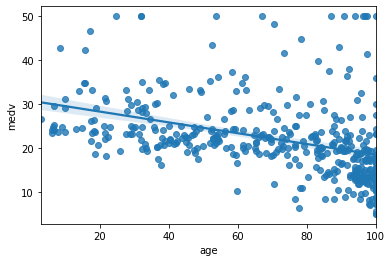

In [6]:
sns.regplot(x="age", y="medv", data=df);

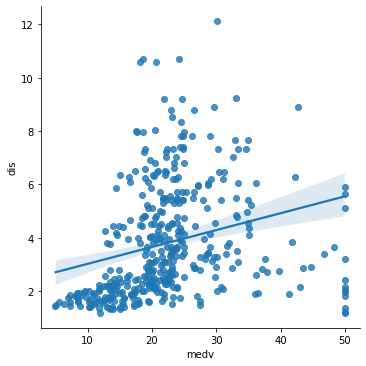

In [7]:
sns.lmplot(x="medv", y="dis", data=df, x_jitter=.05);

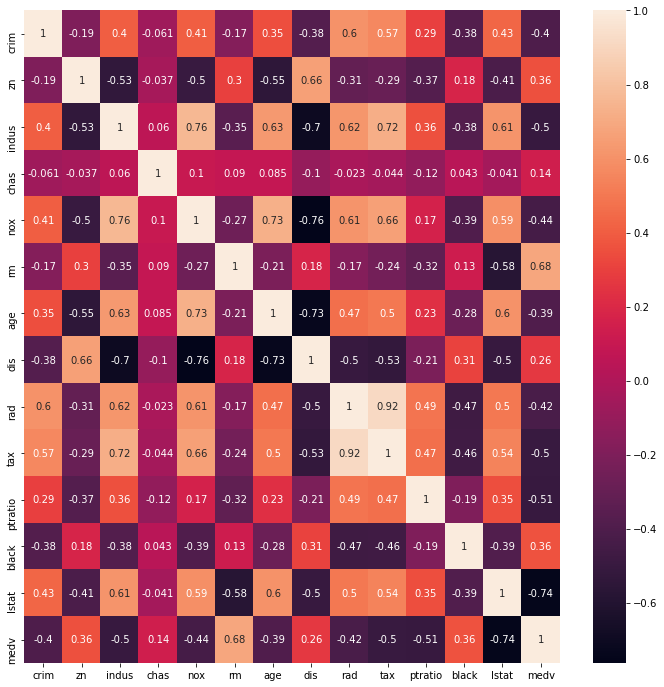

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
# it is needed to drop either tax or rad due that they are correlated 
df.drop(columns="rad", inplace=True)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [24]:
# Your response here
# I expected more correlation between the variables and the house price

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

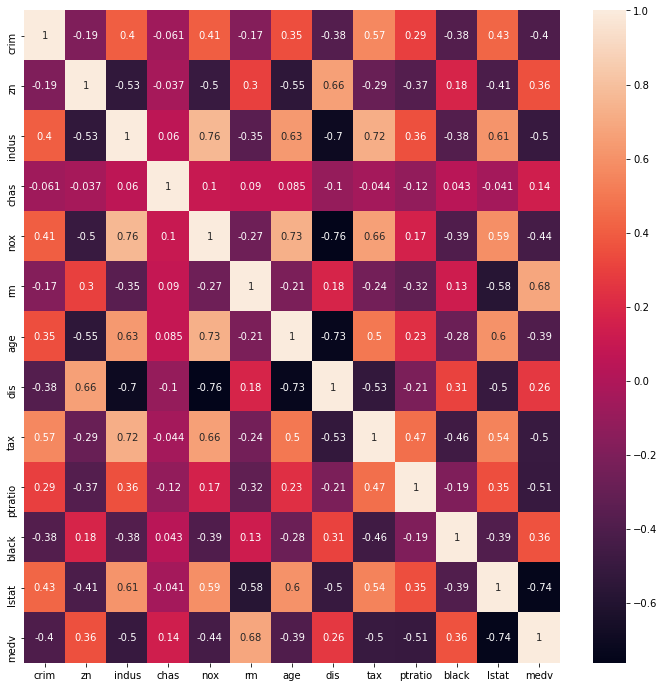

In [23]:
# Your response here
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [26]:
# Your code here
df["medv"].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [27]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return accuracy_score(y_true, y_predict), r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [28]:
# Your code here
from sklearn.model_selection import train_test_split
df_target = df["medv"]
df_features = df.drop(columns = "medv")
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size =0.2, random_state=43, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [29]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Random_Forest_Regressor = GridSearchCV(estimator=RandomForestRegressor(),
                             param_grid={"max_depth":[2, 4, 6, 8, 10]},
                             scoring='r2',
                             cv=5
                             )

In [30]:
Random_Forest_Regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]}, scoring='r2')

Now, plot the score for each tree on the training set and on the testing set.

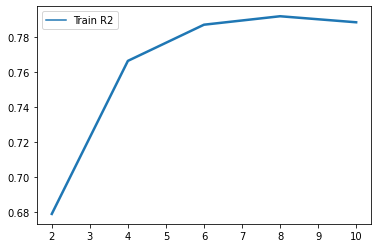

In [31]:
# Produce a plot with the score for the testing and training for the different max depths


Random_Forest_Regressor_results = Random_Forest_Regressor.cv_results_
    
results = pd.DataFrame(Random_Forest_Regressor_results['mean_test_score'], 
                       columns=['Train R2'], 
                       index = Random_Forest_Regressor.param_grid['max_depth'])
 
sns.lineplot(data=results, linewidth=2.5)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [32]:
# Your response here
# the bigger number, the best

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [18]:
# Your response here
# With a maximum depth of 1 the model will have high bias and with10 the model will have high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [33]:
# Your response here
Random_Forest_Regressor.best_estimator_

RandomForestRegressor(max_depth=8)

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [34]:
# Your response here

# Is not remalcable, since city has change a lot
# there are mone needed
# the cuantity of data is not enough to make predictions
# no as the area is really important 
